## Task 1 Week 5
Classify the CIFAR-10 dataset using the shallow
approach 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

np.set_printoptions(suppress=True)

In [2]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.cifar10.load_data()
labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

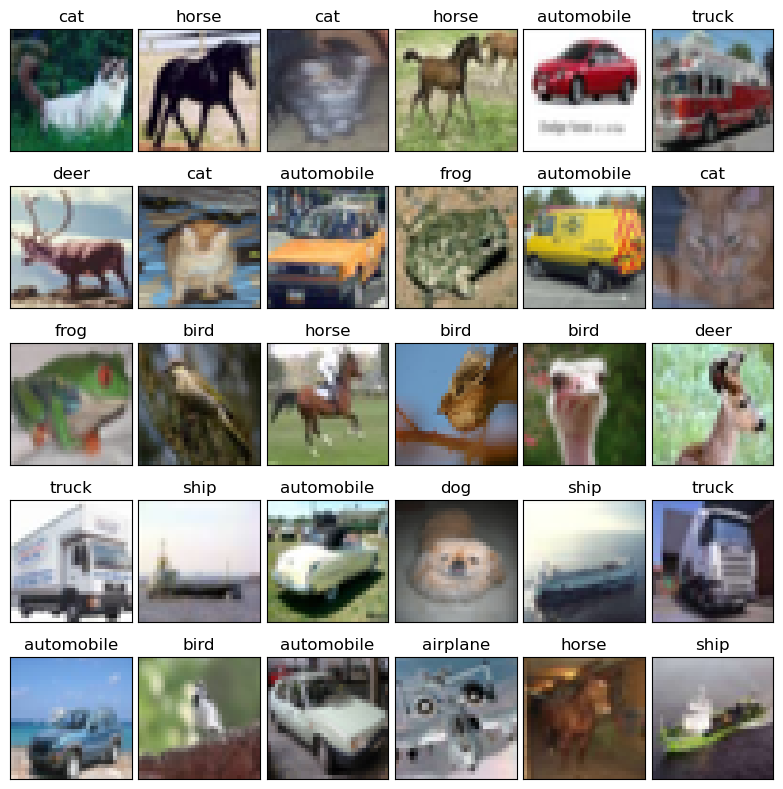

In [3]:
# set up a grid of images
fig, axs = plt.subplots(5,6, figsize=(8, 8), tight_layout=True)
fig.subplots_adjust(hspace = .5, wspace=.005)
axs = axs.ravel()
# plot 30 images selected at random
for i in range(30):
    # choose a random image
    j=np.random.randint(0,len(x_train))
    label = y_train[j]
    image = x_train[j]
    # show the image and display its category
    axs[i].imshow(image)
    axs[i].set_title(labels[int(label)])
    # turn off grids and axis labels
    axs[i].grid(False)
    axs[i].get_xaxis().set_visible(False)
    axs[i].get_yaxis().set_visible(False)
plt.show()

In [5]:
print ('x_train samples = ' + str(x_train.shape)) #each image is stored as numpy array 28x28
print ('y_train samples = ' + str(y_train.shape)) #labels

print ('x_test samples = ' + str(x_test.shape))
print ('y_test samples = ' + str(y_test.shape))

x_train samples = (50000, 32, 32, 3)
y_train samples = (50000, 1)
x_test samples = (10000, 32, 32, 3)
y_test samples = (10000, 1)


In [7]:
# preprocess
y_input = tf.keras.utils.to_categorical(y_train)      #one hot encoder
# this line was reshaping to 784 for MNIST as we had 28x28 greyscale images, now it's 32x32x3=3072
x_input = (np.reshape(x_train, (x_train.shape[0], 3072)) / 255.0).astype(np.float32)

print ('x_input samples = ' + str(x_input.shape))
print ('y_input samples = ' + str(y_input.shape))

x_input samples = (50000, 3072)
y_input samples = (50000, 10)


#### Create model

In [8]:
#variables we are going to try to learn for the predictor
W = tf.Variable(tf.zeros([3072,10])) #weight applied to each pixel in the image
b = tf.Variable(tf.zeros([10])) #offset, constant value applied to every output value individually

2023-05-29 12:22:26.449447: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-29 12:22:27.172868: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14626 MB memory:  -> device: 0, name: Tesla V100-PCIE-16GB, pci bus id: 0001:00:00.0, compute capability: 7.0


### Set-up the multinomial logistic regression

In [9]:
# predicted probability for each class
#using softmax activation layer on a vector with 10 entries
def y_pred(x):
    return tf.nn.softmax(tf.matmul(x,W) + b)

# cross entropy loss function, to train model, as per logistic regression before
def loss(x,y):
    y_ = y_pred(x)  # underscore for prediction
    return tf.reduce_mean(-tf.reduce_sum(y * tf.math.log(y_), axis=[1]))

### Set-up the training routine

In [10]:
train_steps = 2500

# learning rate
lr = 0.001

# sotchastic gradient descent optimizer
optimizer = tf.optimizers.Adam(lr)

### Create a session and run the training

In [11]:
for i in range(train_steps):
    with tf.GradientTape() as tape:
        current_loss = loss(x_input,y_input)
    gradients = tape.gradient(current_loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W ,b])) #updating W and b using optimizers
    if i%100 == 0:
        print('Training Step:' + str(i) + '  Loss = ' + str(current_loss))

Training Step:0  Loss = tf.Tensor(2.3025854, shape=(), dtype=float32)
Training Step:100  Loss = tf.Tensor(1.7844965, shape=(), dtype=float32)
Training Step:200  Loss = tf.Tensor(1.7342663, shape=(), dtype=float32)
Training Step:300  Loss = tf.Tensor(1.7073823, shape=(), dtype=float32)
Training Step:400  Loss = tf.Tensor(1.68961, shape=(), dtype=float32)
Training Step:500  Loss = tf.Tensor(1.6766026, shape=(), dtype=float32)
Training Step:600  Loss = tf.Tensor(1.6665819, shape=(), dtype=float32)
Training Step:700  Loss = tf.Tensor(1.6579732, shape=(), dtype=float32)
Training Step:800  Loss = tf.Tensor(1.6508886, shape=(), dtype=float32)
Training Step:900  Loss = tf.Tensor(1.6450547, shape=(), dtype=float32)
Training Step:1000  Loss = tf.Tensor(1.6394178, shape=(), dtype=float32)
Training Step:1100  Loss = tf.Tensor(1.6346369, shape=(), dtype=float32)
Training Step:1200  Loss = tf.Tensor(1.6319319, shape=(), dtype=float32)
Training Step:1300  Loss = tf.Tensor(1.6264503, shape=(), dtype=f

### Check the accuracy on the training data

In [13]:
#on data it has already seen
y_prob = y_pred(x_input).numpy() #pass to function y_pred and convert to numpy array
print(y_prob.shape)

#compare with actual value
y_prediction = np.argmax(y_prob,axis=-1)  #the max
print('train accuracy: ', np.sum(y_prediction==y_train[:,0])/len(y_train))  #how often agrees with actual data

(50000, 10)
train accuracy:  0.465


### Check the accuracy on the test data

In [15]:
x_test_input = (np.reshape(x_test, (x_test.shape[0], 3072)) / 255.0).astype(np.float32)

y_prob = y_pred(x_test_input).numpy()

print(y_prob.shape)
y_prediction = np.argmax(y_prob,axis=-1)
print('test accuracy: ', np.sum(y_prediction==y_test[:,0])/len(y_test))

(10000, 10)
test accuracy:  0.407


### Look at predictions for different samples

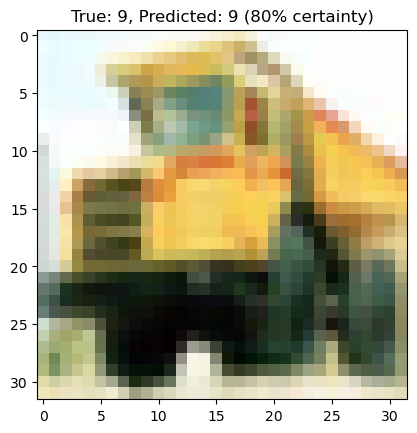

In [34]:
i=400
#400 good certainty
label = y_test[i]
image = x_test[i]
plt.title('True: %d, Predicted: %d (%d%% certainty)' % (label,y_prob[i].argmax(),100*y_prob[i,y_prob[i].argmax()]))
plt.imshow(image)
plt.show()